In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [23]:
# Sequential model for binary classification
ANNclassifySeq = nn.Sequential(
    nn.Linear(2, 1), # input layer
    nn.ReLU(), # activation function
    nn.Linear(1, 1), # output layer
    nn.Sigmoid() # activation function for binary classification
)

In [ ]:
# Class-based model for binary classification
# Normally this way is more flexible and allows us to add more features to the model, 
# such as dropout, batch normalization, etc. --> worth when the model is more complex
class ANNClassifyClass(nn.Module):
    def __init__(self):
        super().__init__()
        # the name of the variables is not fixed, we can call them as we want
        self.input_layer = nn.Linear(2, 1) # input layer
        self.output_layer = nn.Linear(1, 1) # output layer

    def forward(self, x):
        x = self.input_layer(x) # pass through input layer
        x = F.relu(x) # activation function
        x = self.output_layer(x) # pass through output layer
        x = torch.sigmoid(x) # activation function for binary classification
        return x

In [25]:
# create data
points_per_cluster = 100
blur = 1.0 # increase this value to make the clusters more blurry

A = [1, 1] # center of the first cluster
B = [6.5, 1] # center of the second cluster

# generate data
np.random.seed(7) # for reproducibility
data_A = np.random.randn(points_per_cluster, 2) * blur + A
data_B = np.random.randn(points_per_cluster, 2) * blur + B
data = np.concatenate([data_A, data_B])

# true labels
labels_A = np.zeros(points_per_cluster) # class 0
labels_B = np.ones(points_per_cluster) # class 1
labels = np.concatenate([labels_A, labels_B])

# convert to PyTorch tensors
data = torch.tensor(data, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.float32)

In [26]:
# model features
learning_rate = 0.01
loss_fn = nn.BCELoss() # binary cross-entropy loss for binary classification
model = ANNClassifyClass()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [27]:
num_epochs = 100
losses = torch.zeros(num_epochs)

for epoch in range(num_epochs):

    # forward pass
    outputs_class = model(data)
    loss_class = loss_fn(outputs_class.squeeze(), labels)
    losses[epoch] = loss_class.item()

    # backward pass and optimization 
    optimizer.zero_grad()
    loss_class.backward()
    optimizer.step()

predictions_class = model(data).squeeze()

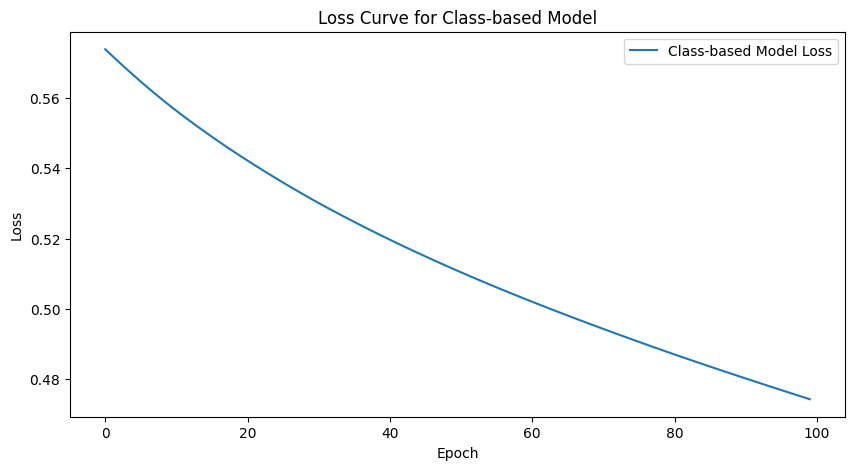

In [28]:
# plot losses
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Class-based Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve for Class-based Model')
plt.legend()
plt.show()